# Titanic Dataset Analysis
#### by Hala Jadallah

## Introduction: 

In this project we are concerned with analyzing the Titanic dataset. We first consider some questions of interest. The Titanic sailed from England, hit an iceberg and sank. Most passengers died, but some survived. 

The dataset has the following variables: 

Pclass: determines the socioeconomic class of the passengers, either lower (Pclass =3), middle (Pclass =2) or upper (Pclass =1).

Sex (male/female), Age (years), Survived (survived=1, died=0), Ticket (a code),
Emabrked (site of embarkation S = Southampton, C=Chergorg, Q = Queenstown), 
Cabin (a code), Name (passenger name), Parch (number of parents or children on board), 
SibSp (number of siblings or spouse on board). 

After a quick look at the data I decided to use the following methodology: 

Level zero: What are the missing values in the data set? Of which variables? Are there any special characteristics of passengers whose value are missing?

I intend explore the data at two levels.

Level I: What are the general characteristics of those who aboarded the Titanic? 
1. In terms of gender, age and socioeconomic (SE) parameters.
2. how many are traveling alone? how many with companion? with chirdren?
3. Across the Pclass of tickets how does the fare range?

Level II: What are the characterics of those who survived?
1. If survived, did any related companions survive too?
2. If survived, how many where traveling alone?
3. what is the age, gender of those who survived? 
4. Is there any relation between fare or Pclass and survival?
5. Is there relation between the site they embarked and survivial?
6. Is there any relation between cabin location and survival? This requires the map of the ship to explain any relation.
 
I intend to explore and investigate the Titanic dataset, to find interesting relations among the many variables invovled. I will use various plots for easy visualization of the ralations.

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#sns.set(style="whitegrid", color_codes=True) ## white background (bkgd) with grid 
#sns.set(style="darkgrid", color_codes=True) ## dark bkgd with grid
#sns.set(style="white", color_codes=True)   ## white bkgd no grid
#sns.set(style="dark", color_codes=True)    ## dark bkgd no grid
#sns.set(style="ticks", color_codes=True)  ## ticks give a little structure to the plot

filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

## Priliminary Exploration
Let's have a look at the variables included in this data set. 

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df['Sex']=titanic_df['Sex'].astype('category')
titanic_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

The table below shows the describution of available data across social class and Sex. 

In [6]:
# Define a new vaiable class with class code as lower, middle and upper

titanic_df['Class'] = titanic_df['Pclass'].astype('object')
titanic_df['Class'].replace({1:'Upper', 2:'Middle', 3:'Lower'},inplace=True)

titanic_df['Survival status'] = titanic_df['Survived'].astype('object')
titanic_df['Survival status'].replace({0:'Died', 1:'Survived'},inplace=True)

titanic_df_group_by_class_sex = titanic_df.groupby(['Sex','Class'])

# the table of counts of data help us to see where the missing values are by sex and class
titanic_df_group_by_class_sex.count()

PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  Ticket  \
Sex    Class                                                                    
female Lower           144       144     144   144  102    144    144     144   
       Middle           76        76      76    76   74     76     76      76   
       Upper            94        94      94    94   85     94     94      94   
male   Lower           347       347     347   347  253    347    347     347   
       Middle          108       108     108   108   99    108    108     108   
       Upper           122       122     122   122  101    122    122     122   

               Fare  Cabin  Embarked  Survival status  
Sex    Class                                           
female Lower    144      6       144              144  
       Middle    76     10        76               76  
       Upper     94     81        92               94  
male   Lower    347      6       347              347  
       Middle   108      6       108              108  
       Upper    122     95       122              122

## Missing Data investigation
A quick scan shows that there are some missing values. 

We observe from the table above that Age, Cabin and Embarked have some missing values. In particular Embarked have 2 female passengers from the upper social class. There are more cabin records for upper class passengers than the other two classes. 

We wish to know more about these missing value.

In [35]:
# missing Age records
s = titanic_df['Age'].isnull()
print 'In this dataset: '
print 'There are ',len(s), 'passengers'
print 'where',len(titanic_df['Age'][s]), ' are missing AGE records'


# age values available in record
index_age_in = titanic_df['Age'].index[~s]

print 'Number of passengers in SE classes whose age is available in record:'
titanic_df['Pclass']=titanic_df['Pclass'].astype('category')
print titanic_df['Pclass'][index_age_in].value_counts(sort = False)

#age values missing
index_age_nan = titanic_df['Age'].index[s]

print 'Number of passengers by survival'
print titanic_df['Survived'][s].value_counts(sort = False)

print 'Number of passengers by sex' 
print titanic_df['Sex'][index_age_nan].value_counts(sort=False)

print 'Number of passengers by the number of siblings or spouse on board'
print titanic_df['SibSp'][s].value_counts(sort = False)

print 'Number of passengers by the number of parent or child on board'
print titanic_df['Parch'][s].value_counts(sort = False)

# data frame of passengers with missing age
T_noAge_df=titanic_df.iloc[index_age_nan]

print 'Titanic passengers with missing age breakdown by survival, sex and SE :'
print T_noAge_df.groupby(['Survived','Sex','Pclass'])['PassengerId'].count()
print T_noAge_df.groupby(['Survived','Sex','Parch'])['PassengerId'].count()
print T_noAge_df.groupby(['Survived','Sex','SibSp'])['PassengerId'].count()



In this dataset: 
There are  891 passengers
where 177  are missing AGE records
Number of passengers in SE classes whose age is available in record:
1    186
2    173
3    355
Name: Pclass, dtype: int64
Number of passengers by survival
0    125
1     52
Name: Survived, dtype: int64
Number of passengers by sex
female     53
male      124
Name: Sex, dtype: int64
Number of passengers by the number of siblings or spouse on board
0    137
1     26
2      3
3      4
8      7
Name: SibSp, dtype: int64
Number of passengers by the number of parent or child on board
0    157
1      8
2     12
Name: Parch, dtype: int64
Titanic passengers with missing age breakdown by survival, sex and SE :
Survived  Sex     Pclass
0         female  3         17
          male    1         16
                  2          7
                  3         85
1         female  1          9
                  2          2
                  3         25
          male    1          5
                  2          2
         

In [18]:
# missing cabin values
sc = titanic_df['Cabin'].isnull()
print 'There are ', len(titanic_df['Cabin'][sc]), ' missing CABIN records'
index_cabin_nan = titanic_df['Cabin'].index[sc]
index_cabin_in = titanic_df['Cabin'].index[~sc]

print 'Number of passengers in each of the SE classes whose cabin record is missing:'
print titanic_df['Pclass'][index_cabin_nan].value_counts(sort = False)

print '\n Number of passengers in each of the SE classes whose cabin is in record:'
print titanic_df['Pclass'][index_cabin_in].value_counts(sort = False)


There are  687  missing CABIN records
Number of passengers in each of the SE classes whose cabin record is missing:
1     40
2    168
3    479
Name: Pclass, dtype: int64

 Number of passengers in each of the SE classes whose cabin is in record:
1    176
2     16
3     12
Name: Pclass, dtype: int64


In [22]:
# missing embarked values
se = titanic_df['Embarked'].isnull()
print 'There are ', len(titanic_df['Embarked'][se]), ' missing EMBARKED records'
index_embarked_nan = titanic_df['Embarked'].index[se]
index_embarked_in = titanic_df['Embarked'].index[~se]

print 'SE classes whose embarked record is missing:'
print titanic_df['Pclass'][index_embarked_nan].value_counts(sort=False)

print 'Number of passengers who servived whose embarked record is missing'
print titanic_df['Survived'][index_embarked_nan].value_counts(sort = False)

print 'Number of passegers by the number of siblings or spouse on board'
print titanic_df['SibSp'][index_embarked_nan].value_counts(sort = False)

print 'Number of passegers by the number of parent or child on board'
print titanic_df['Parch'][index_embarked_nan].value_counts(sort = False)


print '\n Number of passengers embarked from each of the three ports and whose embarked record is available: '
print titanic_df['Embarked'][index_embarked_in].value_counts(sort=False)

There are  2  missing EMBARKED records
SE classes whose embarked record is missing:
1    2
Name: Pclass, dtype: int64
Number of passengers who servived whose embarked record is missing
1    2
Name: Survived, dtype: int64
Number of passegers by the number of siblings or spouse on board
0    2
Name: SibSp, dtype: int64
Number of passegers by the number of parent or child on board
0    2
Name: Parch, dtype: int64

 Number of passengers embarked from each of the three ports and whose embarked record is available: 
C    168
Q     77
S    644
Name: Embarked, dtype: int64


In [34]:
# Age values summaries
print titanic_df['Age'].describe()
print(titanic_df.groupby('Pclass')['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
Pclass       
1       count    186.000000
        mean      38.233441
        std       14.802856
        min        0.920000
        25%       27.000000
        50%       37.000000
        75%       49.000000
        max       80.000000
2       count    173.000000
        mean      29.877630
        std       14.001077
        min        0.670000
        25%       23.000000
        50%       29.000000
        75%       36.000000
        max       70.000000
3       count    355.000000
        mean      25.140620
        std       12.495398
        min        0.420000
        25%       18.000000
        50%       24.000000
        75%       32.000000
        max       74.000000
Name: Age, dtype: float64


We learn that there are 177 passengers whose age is not recorded. The median age recorded is 28 and we know that 75% of the passengers with known age is 38 years or less. The mean
is about 30 years and the standard deviation is 14.5 years. This implies that, within two standard deviation we have all people in the range of 1 to 59 years old. This is 97.5% of the passengers. As we will see below there are 22 passengers who are over 60 years old. The maximum age of a passenger on board is 80 years. 

We would like to identify which socio-economic (SE) class, sex and survived passenger do those of missing age belong.
Below is a bar chart that show they come mainly from lowest SE class and they tend to be males. 
Observe also that the females in this group who did not survive are all from the lower class.
Morevoer, 71% of those whose age is missing did not servive. 

Clearly the data is biased against those who did not survive, those who belong to the lower social class and against males. When did they make a record of the age? one wonders, was it before boarding the ship or after the disaster occured so that while searching for the missing not every passenger's age was recorded. As the tabulation shows, most females and males with missing age record did not have parent/child or sibling/spouse on board.  

Moreover we observe that  77% of the passengers have no cabin record, where most of these passengers are from the lower and middle classes. Again we wonder when the record was taken and what type of cabins did the lower and middle class passengers where assigned. Did any of those with no cabin survive? this is something to investigate. 

Only two upper class female passengers did not have embarkation record. However, both have age recorded and who survived and with no companion such as parent/child or sibling/spouse.

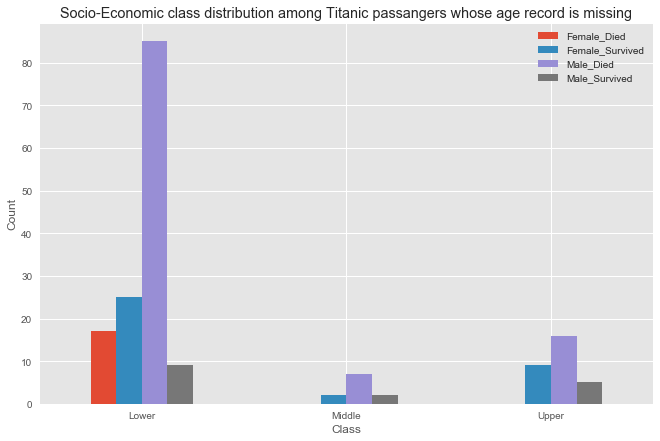

In [29]:
#counts of females and male whose age is missing comparing those who died and survived
# in the three SE classes.
#
# Preparing for a bar plot


#females who died
female_died = T_noAge_df['Class'][(T_noAge_df['Sex'] == 'female') & \
(T_noAge_df['Survived'] == 0)].value_counts(sort=False)
#males who died
male_died = T_noAge_df['Class'][(T_noAge_df['Sex'] == 'male') & \
(T_noAge_df['Survived']==0)].value_counts(sort=False)
#females who survived
female_survivied = T_noAge_df['Class'][(T_noAge_df['Sex'] == 'female') & \
(T_noAge_df['Survived'] == 1)].value_counts(sort=False)
#males who survived
male_survived = T_noAge_df['Class'][(T_noAge_df['Sex'] == 'male') & \
(T_noAge_df['Survived'] == 1)].value_counts(sort=False)

#Data Frame of counts of each group in each Class
survival_by_sex_miss_df = pd.DataFrame({'Female_Survived': female_survivied, \
                                       'Female_Died': female_died,\
                                        'Male_Survived': male_survived, \
                                       'Male_Died' : male_died})

plt.figure();
ax = survival_by_sex_miss_df.plot.bar(figsize=(11,7),rot=0)
ax.set(xlabel = 'Class', ylabel = 'Count',\
title = 'Socio-Economic class distribution among Titanic passangers \
whose age record is missing')

plt.show()

## General characteristics of passengers

Now we would like to understand the demographics of the passengers. So we look to find answers to questions such as: how many males and females were on board? how many in each of the social classes? etc.  

In [16]:
titanic_df_group_class_by_sex = titanic_df.groupby(['Sex'])['Pclass']
print 'Number of females and males on board'
print titanic_df_group_class_by_sex.count()

Number of females and males on board
Sex
female    314
male      577
Name: Pclass, dtype: int64


We look at the distburion in passangers among SE classes and Sex groups 

In [17]:
# Distrbution of passangers on board among the three SE classes. 
print 'Proportion of passengers in each class'
print titanic_df['Pclass'].value_counts(sort=False)*100/len(titanic_df)

Proportion of passengers in each class
1    24.242424
2    20.650954
3    55.106622
Name: Pclass, dtype: float64


In [18]:
# Distribution of males on board in each class
titanic_males = sum(titanic_df['Sex'] == 'male')
print 'Proportion of male passengers in each class'
print titanic_df['Pclass'][titanic_df['Sex'] == 'male'].value_counts(sort=False)*100/titanic_males


Proportion of male passengers in each class
1    21.143847
2    18.717504
3    60.138648
Name: Pclass, dtype: float64


In [19]:
# Distribution of females on board in each SE class
titanic_females = sum(titanic_df['Sex'] == 'female')
print 'Proportion of female passengers in each class'
print titanic_df['Pclass'][titanic_df['Sex'] == 'female'].value_counts(sort=False)\
*100/titanic_females

Proportion of female passengers in each class
1    29.936306
2    24.203822
3    45.859873
Name: Pclass, dtype: float64


In [20]:
print 'Number of females and males in each class'
print titanic_df.groupby(['Pclass','Sex'])['PassengerId'].count()

Number of females and males in each class
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64


We compare the median age and fare of passangers acorss SE classes and Sex. Notice that females fares are consistently higher across SE classes compared to male fares. 

In [21]:
#Tabulate the median of age and fare across class and sex.
titanic_grouped_by_pclass_sex = titanic_df.groupby(['Class','Sex'])
titanic_grouped_by_pclass_sex['Age','Fare'].median()

Age      Fare
Class  Sex                   
Lower  female  21.5  12.47500
       male    25.0   7.92500
Middle female  28.0  22.00000
       male    30.0  13.00000
Upper  female  35.0  82.66455
       male    40.0  41.26250

Next we would like to know the distributin of children. We consider a child, a passenger whose age is less than or equal to 15 years. 

In [41]:
# data frame for children
titanic_df_child = pd.DataFrame({'Class' : titanic_df['Class'], 'Sex' : titanic_df['Sex'],\
                                'Child' : (titanic_df['Age'] <=15), \
                                'with Parent' : ((titanic_df['Age'] <= 15) & (titanic_df['Parch']\
                                                                        != 0))})

In the table below "Parent" means the number of children who are accompanied by at least one parent. 
We observe from this table that one female from the middle socio-economic class is not accompanied by at least one parent. Similarly 8 females and 2 males from the lowest socio-economic are not accompanied by at least one parent.

In [42]:
titanic_child_grouping = titanic_df_child.groupby(['Class','Sex'])['Child','with Parent']
titanic_child_grouping.sum()

Child  with Parent
Class  Sex                       
Lower  female   30.0         22.0
       male     28.0         26.0
Middle female   10.0          9.0
       male      9.0          9.0
Upper  female    3.0          3.0
       male      3.0          3.0

Next we would like to study the age distrbution among Titanic passengers.
We define the following age categories:

Child such that age <= 15

Youth such that 15 < Age <= 30

Adult such that 30 < Age <= 45

MidAge such that 45 < Age <= 60

Senior such that 60 < Age <= 75


OldAge such that Age > 75

Lets find the exact count in each age group.

In [46]:
# Data frame for specific age category
titanic_df_age_category = pd.DataFrame( {'Class' : titanic_df['Class'], \
    'Sex' : titanic_df['Sex'],'Child' : (titanic_df['Age'] <=15), \
    'Youth' : ((titanic_df['Age'] > 15) & (titanic_df['Age'] <= 30)), \
    'Adult': ((titanic_df['Age'] > 30) & (titanic_df['Age'] <= 45)), \
    'MidAge': ((titanic_df['Age'] > 45) & (titanic_df['Age'] <= 60)), \
'Senior' : ((titanic_df['Age'] > 60) & (titanic_df['Age'] <= 75)), \
                                       'OldAge' : ((titanic_df['Age'] > 75))})
#print titanic_df_age_category.sum()

# Total number of passengers in each age category
print 'Total number of passengers in each age category'
age_columns=['Child','Youth','Adult','MidAge','Senior','OldAge']
print titanic_df_age_category[age_columns].sum()

# Counts of age category by class and sex
print '\nCounts of age category by class and sex'
titanic_age_category_grouping = titanic_df_age_category.groupby(['Class','Sex'])
titanic_age_category_grouping.sum()

Total number of passengers in each age category
Child      83
Youth     326
Adult     202
MidAge     81
Senior     21
OldAge      1
dtype: int64

Counts of age category by class and sex


Adult  Child  MidAge  OldAge  Senior  Youth
Class  Sex                                                
Lower  female   20.0   30.0     2.0     0.0     1.0   49.0
       male     65.0   28.0    11.0     0.0     4.0  145.0
Middle female   23.0   10.0     7.0     0.0     0.0   34.0
       male     31.0    9.0    13.0     0.0     3.0   43.0
Upper  female   30.0    3.0    18.0     0.0     2.0   32.0
       male     33.0    3.0    30.0     1.0    11.0   23.0

Here is a bar plot of these groups 

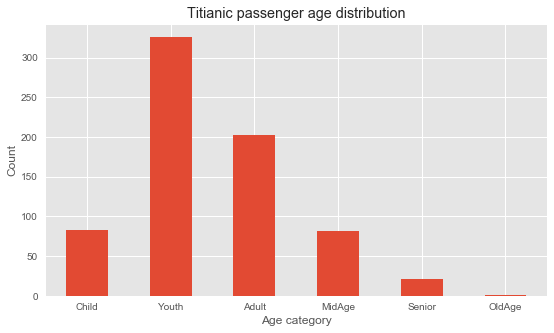

In [26]:
ax =titanic_df_age_category[age_columns].sum().plot.bar(figsize=(9,5),rot=0)
ax.set(xlabel='Age category', ylabel='Count', Title='Titianic passenger age distribution')
plt.show()

Below is a histogram of the age distribution without refering the the age categories we used above. 

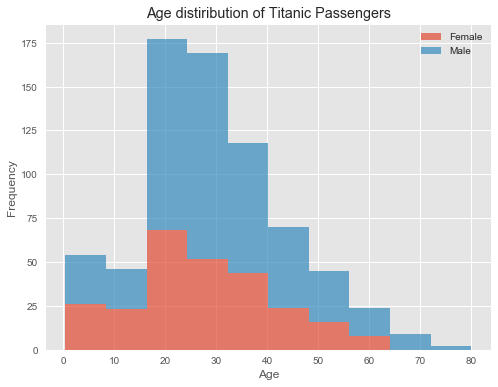

In [27]:
#Stacked historgram of Age for females and males
age_by_sex = pd.DataFrame({'Male' : titanic_df['Age'][titanic_df['Sex']=='male'],\
                          'Female': titanic_df['Age'][titanic_df['Sex']=='female']})

ax = age_by_sex.plot.hist(stacked = True, alpha=0.7, figsize=(8,6))
ax.set(xlabel='Age', title='Age distiribution of Titanic Passengers')
plt.show()

Below is age histogram with 10 years increment

[<matplotlib.text.Text at 0xcdd7630>, <matplotlib.text.Text at 0xc9c1ef0>]

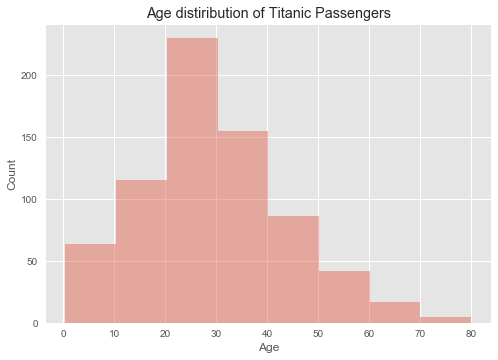

In [49]:
ax = sns.distplot(titanic_df['Age'][~s], bins=8, kde=False, rug=False)
ax.set(ylabel = 'Count', title='Age distiribution of Titanic Passengers')

Notice that most ridership is composed of Youth and adults between the ages of 15 and 45 years. The distribution is almost symmetric around the mean and almost matches the emprical rule that 68% of the passengers lie within one standard deviation (about 15 years) from the mean (about 30 years). In fact in this case, 59.2% of the passangers lie in this range. 

The swarm plot below shows the distribution of age broken down by sex and class. Observe how the 18 - 37 year old lower class males dominate the ridership, averaging around 27 years. The upper class tend be older on average centered around 40 years, while the middle class the average age centers around 30 years.

In [33]:
#help(sns.factorplot)

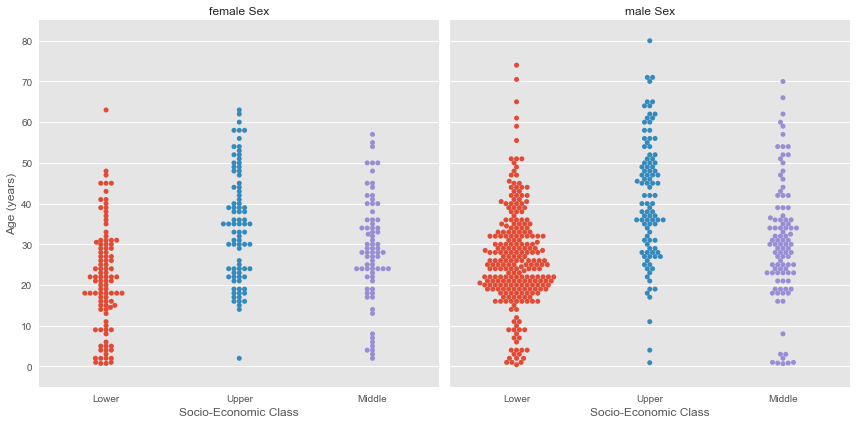

In [47]:
#sns.swarmplot(x=titanic_df['Class'],y=titanic_df['Age'])
#with sns.plotting_context("notebook"):
sns.plotting_context('notebook')
g = sns.factorplot(x='Class',y='Age', col='Sex', data=titanic_df, kind='swarm', size=6, aspect=1)

(g.set_axis_labels("Socio-Economic Class", "Age (years)")\
# .set_xticklabels(["", "", ""])\
 .set_titles("{col_name} {col_var}")\
 .set(ylim=(-5, 85)).despine(left=True)) 

Below we look at the bar chart for SE classes. This is a visual presentation of the distribution of the upper, middle and lower SE classes. Recall we found out above that among the 891 passengers: 24% are in  the upper class, 21% are in the middle and 55% are in the lower class.  

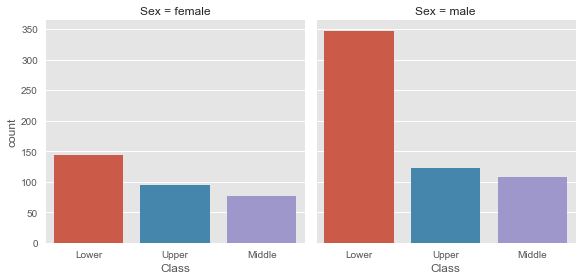

In [30]:
sns.factorplot(x='Class',col='Sex',kind='count',data=titanic_df)

Class
Lower     25.140620
Middle    29.877630
Upper     38.233441
Name: Age, dtype: float64


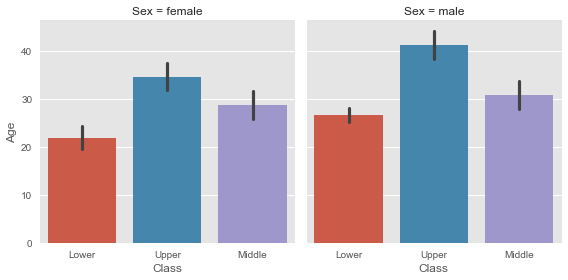

In [87]:
#the average age with error estimate reflected in a bar chart
sns.factorplot(x='Class',y='Age',col='Sex',kind='bar',data=titanic_df)
print titanic_df.groupby('Class')['Age'].mean()

We turn our attention now to fare distribution. One would expect that children may have lower fares that adults. People from lower socio-economic class will have lower fare than the upper class. Lets see whethter these assumptions hold. 

In [51]:
pclass_1 = (titanic_df['Pclass'] == 1) & ~s
pclass_2 = (titanic_df['Pclass'] == 2) & ~s
pclass_3 = (titanic_df['Pclass'] == 3) & ~s

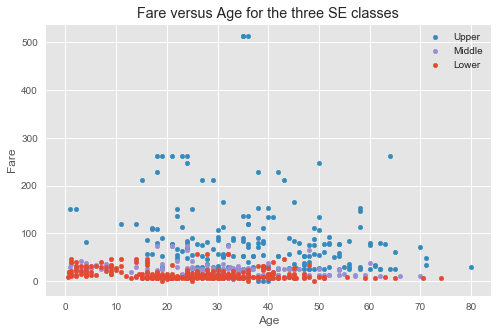

In [54]:
fare_age_df = pd.DataFrame({'Fare_upper': titanic_df['Fare'][pclass_1], \
              'Fare_middle': titanic_df['Fare'][pclass_2],\
             'Fare_lower': titanic_df['Fare'][pclass_3],\
             'Age_upper': titanic_df['Age'][pclass_1], \
              'Age_middle': titanic_df['Age'][pclass_2],\
             'Age_lower': titanic_df['Age'][pclass_3],})

ax = fare_age_df.plot.scatter(x='Age_upper',y='Fare_upper',\
                        color = 'C1' ,label= 'Upper', figsize=(8,5));
fare_age_df.plot.scatter(x='Age_middle',y='Fare_middle',\
                        color = 'C2',label= 'Middle', ax=ax)
fare_age_df.plot.scatter(x='Age_lower',y='Fare_lower',\
                        color = 'C0',label= 'Lower', ax=ax)
ax.set(xlabel='Age',ylabel='Fare', title = "Fare versus Age for the three SE classes")
plt.show()


We notice that there are some fares that are way too high. We wish to look at the plot for fares that are less than 200. 

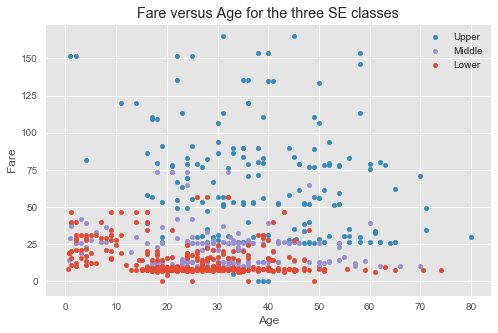

In [53]:
fare_upper_lim = 200
low_cost= titanic_df.query('Fare < {}'.format(fare_upper_lim))

fare_age_df = pd.DataFrame({'Fare_upper': low_cost['Fare'][pclass_1], \
              'Fare_middle': low_cost['Fare'][pclass_2],\
             'Fare_lower': low_cost['Fare'][pclass_3],\
             'Age_upper': low_cost['Age'][pclass_1], \
              'Age_middle': low_cost['Age'][pclass_2],\
             'Age_lower': low_cost['Age'][pclass_3],})

ax = fare_age_df.plot.scatter(x='Age_upper',y='Fare_upper',\
                        color = 'C1' ,label= 'Upper', figsize=(8,5));
fare_age_df.plot.scatter(x='Age_middle',y='Fare_middle',\
                        color = 'C2',label= 'Middle', ax=ax)
fare_age_df.plot.scatter(x='Age_lower',y='Fare_lower',\
                        color = 'C0',label= 'Lower', ax=ax)
ax.set(xlabel='Age',ylabel='Fare', title = "Fare versus Age for the three SE classes")
plt.show()

We observe from the above plot that fare does not depend on age and the fares of some children less than 10 years are high when compared to the other fares in the same class. 

We observe morever that upper class have far more variability in fares than the middle and lower SE classes. 

Let's look at the histograms of the fare for each of the three classes.
As you see below, the middle class has two spikes while the lower class has one dominant spike. We observe the vairability in the histogram of the upper class again. 


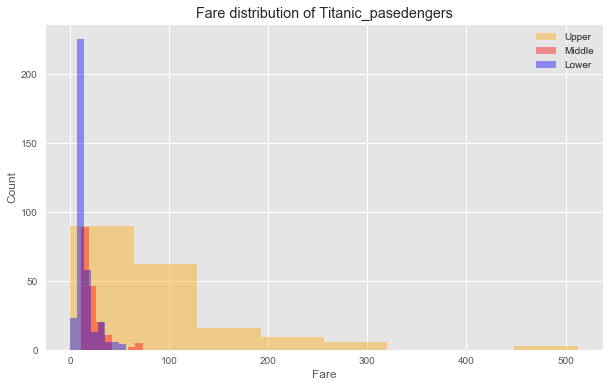

In [55]:
# Histogram of Fare for each of the classes
plt.figure(figsize=(10,6))
ax = sns.distplot(titanic_df['Fare'][pclass_1], bins=8, kde=False, rug=False,\
                 color='orange', label='Upper')

sns.distplot(titanic_df['Fare'][pclass_2], bins=8, kde=False, rug=False,label = 'Middle',\
             color = 'red',ax=ax)
sns.distplot(titanic_df['Fare'][pclass_3], bins=8, kde=False, rug=False,label='Lower', \
             color='blue',ax=ax)
ax.set(ylabel='Count', title='Fare distribution of Titanic_pasedengers')
#unfortunately the lebel in sns.distplot above did not work so I have to enforce it here
ax.legend(('Upper','Middle','Lower'))
plt.show()

I would like to get some insight about those fares that are really high.

As you see from the table below three passengers share the same fare and ticket!

In [36]:
fare_above_300 = titanic_df['Fare'] > 300
titanic_df[fare_above_300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Survival status
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Upper,Survived
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Upper,Survived
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Upper,Survived


In [37]:
# How many unique tickets are there?
titanic_df['Ticket'].nunique()

681

There are 681 unique tickets out of 891. Which means there are many passangers who share the same ticket. These tickets have the same fare. 

As we see below it turns out there are 344 passengers who share the same ticket with at least one more passenger.

There are 134 tickets that are what I call multiple tickets, that is tickets that are shared by at least two passengers.


In [58]:
#How many passengers share a ticket?

tickets_counts = titanic_df['Ticket'].value_counts(sort=False)
print 'count of unique tickets ',len(tickets_counts)
print 'number of tickets not shared by more than one passenger is ', sum(tickets_counts ==1)
print 'Tickets that are shared by at least two passenegers ',sum(tickets_counts > 1)
print 'Sample of uniqe tickets with their counts'
print tickets_counts[:5], titanic_df['Ticket'][:5]

# create a data frame for tickets and their counts
#I need a column 'Tickets' when I use .merge function with the full data frame
tk_idx = tickets_counts.index.tolist() 
titanic_tickets_df = pd.DataFrame({'Ticket': tk_idx, 'Tcount':tickets_counts})
# Number of passenger for each multiple ticket type.
print 'Shared tickets (by number of shares) and passenger counts per share type'
titanic_tickets_df['Tcount'].value_counts(sort=False)

count of unique tickets  681
number of tickets not shared by more than one passenger is  547
Tickets that are shared by at least two passenegers  134
Sample of uniqe tickets with their counts
367226             2
S.W./PP 752        1
SOTON/OQ 392090    1
C.A. 29566         1
2653               2
Name: Ticket, dtype: int64 0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object
Shared tickets (by number of shares) and passenger counts per share type


1    547
2     94
3     21
4     11
5      2
6      3
7      3
Name: Tcount, dtype: int64

My goal now is to be able to tell from the record of each passenger how many passengers share the same ticket. This helps in identifying the demography of those who share tickets. Moreover, this will allow me to study the fares of single tickets and compare it to fares of multiple tickets. One way to do this is to divide the fare by the number of passengers on the same ticket. 

Towards this goal we merge the existing titanic_df data frame to the titanic_tickets_df data frame so that we have a new columns Tcount that shows for each passenger how many share the same ticket. 

In [59]:
titanic_2_df = titanic_df.merge(titanic_tickets_df, on = 'Ticket', how = 'inner')
titanic_2_df.head(5)
titanic_2_df.loc[:13,['Pclass','Age','Ticket','Fare','Tcount','Name']]

,Pclass,Age,Ticket,Fare,Tcount,Name
0,3,22.0,A/5 21171,7.2500,1,"Braund, Mr. Owen Harris"
1,1,38.0,PC 17599,71.2833,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,26.0,STON/O2. 3101282,7.9250,1,"Heikkinen, Miss. Laina"
3,1,35.0,113803,53.1000,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,1,37.0,113803,53.1000,2,"Futrelle, Mr. Jacques Heath"
5,3,35.0,373450,8.0500,1,"Allen, Mr. William Henry"
6,3,NaN,330877,8.4583,1,"Moran, Mr. James"
7,1,54.0,17463,51.8625,1,"McCarthy, Mr. Timothy J"
8,3,2.0,349909,21.0750,4,"Palsson, Master. Gosta Leonard"
9,3,8.0,349909,21.0750,4,"Palsson, Miss. Torborg Danira"


I am curious about people who have the same last name. You would think they would be related and they are more likely share the same ticket. Lets investigate this. First I would like to capture the last name only to simplify the process.

As you see below, there are 667 unique last names among the passengers. It makes sense to repeat the process we did for tickets, that is to find the number of last names shared by more than one passanger and there count. 

In [60]:
titanic_2_df['Last_Name'] = titanic_2_df['Name'].str.split(', ').str[0]  


In [61]:
#How many last names are unique? 
#How many passengers share the same last name?

titanic_lastname = titanic_2_df['Last_Name'].value_counts(sort=False)
print 'Count of unique last names ', len(titanic_lastname)
print 'Count of last names that are shared by at least two passenegers ',\
sum(titanic_lastname > 1)
print titanic_lastname[:5], titanic_2_df['Last_Name'][:5]

ln_idx = titanic_lastname.index.tolist() #I need a column 'Last_Name' when I use .merge function
titanic_lastname_df = pd.DataFrame({'Last_Name': ln_idx, 'Lcount':titanic_lastname})
titanic_lastname_df[titanic_lastname_df['Lcount']==9]
titanic_lastname_df['Lcount'].value_counts(sort=False)

Count of unique last names  667
Count of last names that are shared by at least two passenegers  133
Sawyer      1
Karaic      1
Karun       1
Carlsson    2
Svensson    2
Name: Last_Name, dtype: int64 0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4     Futrelle
Name: Last_Name, dtype: object


1    534
2     83
3     28
4     14
5      1
6      5
7      1
9      1
Name: Lcount, dtype: int64

From the above analysis we see that, most likely, many passengers on the same ticket also share the same last name. However we know that there are passengers on the same ticket with different last names and there are passengers with the same last name who are on different tickets. Of course, passengers with the same last name are not necessarily related. I will not pursue the roll of the the last name any further.

Now I will focus only on the counts of tickets with multiple passengers mainly to resolve the fare that passengers had paid to be on board. Towards this goal we combine the titanic data with the count data for each passenger. 

In [62]:
# tickets with multiple passangers are more expensive
    # to get a sence of its price for these passangers
    # we devide the fare by the number of passangers
    # who share the same ticket
    # 'Fare_pp' refers to Fare_per_passanger

titanic_2_df['Fare_pp']=(titanic_2_df['Fare']/(titanic_2_df['Tcount'].apply(pd.to_numeric)))

After this point we will not add or modify the titanic data frame. 

Age is the most important factor with missing data. Therefore I want to have the data set in different formats some with or without these  passengers data.

I will ignore the cabin missing data for now but keep it in mind. We will refer to this as it will explaing the variability in fare as you will see below. 

In [73]:
# identifying records of passenger with missing age for titanic_2_df DataFrame
s2 = titanic_2_df['Age'].isnull()
#print 'There are ', len(titanic_2_df['Age'][s2]), ' missing Age records'

# To be used later
index_age_nan = titanic_2_df['Age'].index[s2]
index_age_in = titanic_2_df['Age'].index[~s2]

titanic_2a_df = titanic_2_df.iloc[index_age_in]
titanic_2am_df = titanic_2_df.iloc[index_age_nan]

Below are blox plots that compares the fair across the upper, middle, and the lower (socio-ecomic) classes, without the outliers fares that at greater than 200. The other boxplot is for fare per passenger. 

When comparing the box plots we observe the variability of fare per passenger is less for the middle and lower classes but not for the upper class. 

The variability of fares for the middle and lower class only, is explained by tickets with multiple passenegers. Not the case of upper class. 

Why did some upper class passangers had low fares as low as the lower class while others paid way more than upper class average, is not so clear! More on this below. 


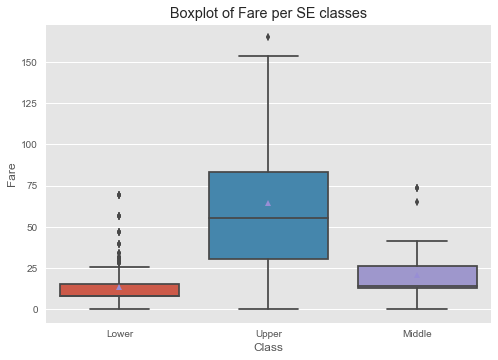

In [66]:
fare_upper_limit = 200
low_cost_2_df = titanic_2_df.query('Fare < {}'.format(fare_upper_limit))
sns.boxplot(x='Class', y='Fare', data=low_cost_2_df, showmeans=True)
plt.title('Boxplot of Fare per SE classes')
plt.show()

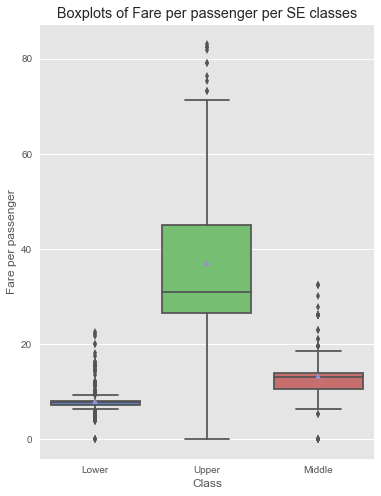

In [71]:
plt.figure(figsize=(6,8))
sns.boxplot(x='Class',y='Fare_pp', data=low_cost_2_df, showmeans = True, palette=('muted'))
plt.title('Boxplots of Fare per passenger per SE classes')
plt.ylabel('Fare per passenger')
plt.show()

I am a bit curious about the trail of upper extreme fare values in the lower class. Below I calculate the percentage of lower class passeneger who exceed the upper wisker limit in the box plot.  

In [68]:
# third quartile
q75 = titanic_2_df['Fare_pp'][titanic_2_df['Class']=='Lower'].quantile(0.75)
# first quartile
q25 = titanic_2_df['Fare_pp'][titanic_2_df['Class']=='Lower'].quantile(0.25)
# computeing the upper wisker limit using the interquartile range
upper_wisker_limit =  (q75-q25)*1.5+q75
print 'The upper wisker limit of the boxplot for the Lower class is ',upper_wisker_limit

# number of lower class passengers who are above the upper end wisker
Lower_extreme = titanic_2_df['Fare_pp'][(titanic_2_df['Class'] == 'Lower') & \
                        (titanic_2_df['Fare_pp'] > upper_wisker_limit)].value_counts().sum()
print 'Number of lower class passengers who paid relatively much higher fare is ',Lower_extreme

Lower_extreme_percent = round(1.0*Lower_extreme/sum(titanic_2_df['Class']=='Lower'),3)
print 'This comprises ',Lower_extreme_percent*100,'% of Lower class passengers.'
print 'The Lower class upper wisker limit is the ', (1-Lower_extreme_percent)*100,'percentile.'

The upper wisker limit of the boxplot for the Lower class is  9.25
Number of lower class passengers who paid relatively much higher fare is  67
This comprises  13.6 % of Lower class passengers.
The Lower class upper wisker limit is the  86.4 percentile.


Here is a histogram of fare per passenger broken down by class.

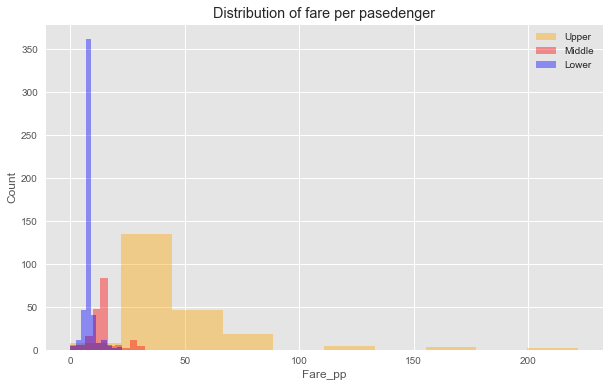

In [109]:
# Histogram of Fare for each of the classes
plt.figure(figsize=(10,6))
ax = sns.distplot(titanic_2_df['Fare_pp'][titanic_2_df['Class'] == 'Upper'], bins=10, kde=False, rug=False,\
                 color='orange', label='Upper')

sns.distplot(titanic_2_df['Fare_pp'][titanic_2_df['Class'] == 'Middle'], bins=10, kde=False, rug=False,label = 'Middle',\
             color = 'red',ax=ax)
sns.distplot(titanic_2_df['Fare_pp'][titanic_2_df['Class'] == 'Lower'], bins=10, kde=False, rug=False,label='Lower', \
             color='blue',ax=ax)
ax.set(ylabel='Count', title='Distribution of fare per pasedenger')
#unfortunately the lebel in sns.distplot above did not work so I have to enforce it here
ax.legend(('Upper','Middle','Lower'))
plt.show()

Lets look at the distribution of passengers across the three harbors (ports) for each of the classes separately. 

Please note, in studying the Embarkation site patterns I am including all passengers. Thant is I am not excluding those with missing age. 

In [74]:
#C = Cherbourg, Q = Queenstown, S = Southampton
idx_pclass3_emb_S = (titanic_2_df['Pclass'] == 3) & (titanic_2_df['Embarked'] == 'S')
idx_pclass3_emb_C = (titanic_2_df['Pclass'] == 3) & (titanic_2_df['Embarked'] == 'C')
idx_pclass3_emb_Q = (titanic_2_df['Pclass'] == 3) & (titanic_2_df['Embarked'] == 'Q')
print 'lower class embarked  at :', 'S is ',sum(idx_pclass3_emb_S), ' C is ', \
sum(idx_pclass3_emb_C), ' Q is ', sum(idx_pclass3_emb_Q)

print 'Number of passneger by embarkation site'
print titanic_2_df['Embarked'].value_counts(sort=False)
print '\n Number of Lower class passengers by embarkation site'
print titanic_2_df['Embarked'][titanic_2_df['Pclass'] == 3].value_counts(sort=False)

print '\n Number of Middle class passengers by embarkation site'
print titanic_2_df['Embarked'][titanic_2_df['Pclass'] == 2].value_counts(sort=False)

print '\n Number of Upper class passengers by embarkation site'
print titanic_2_df['Embarked'][titanic_2_df['Pclass'] == 1].value_counts(sort=False)

lower class embarked  at : S is  353  C is  66  Q is  72
Number of passneger by embarkation site
C    168
Q     77
S    644
Name: Embarked, dtype: int64

 Number of Lower class passengers by embarkation site
C     66
Q     72
S    353
Name: Embarked, dtype: int64

 Number of Middle class passengers by embarkation site
C     17
Q      3
S    164
Name: Embarked, dtype: int64

 Number of Upper class passengers by embarkation site
C     85
Q      2
S    127
Name: Embarked, dtype: int64


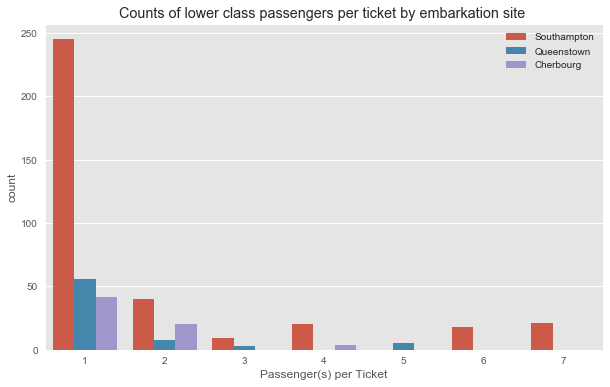

In [78]:
plt.figure(figsize = (10,6))
lower_class = titanic_2_df[titanic_2_df['Class'] == 'Lower']
ax = sns.countplot(x='Tcount', hue = 'Embarked', data = lower_class)
ax.legend(('Southampton','Queenstown','Cherbourg'), loc='upper right')
ax.set(title = 'Counts of lower class passengers per ticket by embarkation site ', \
      xlabel='Passenger(s) per Ticket'  )
plt.show()

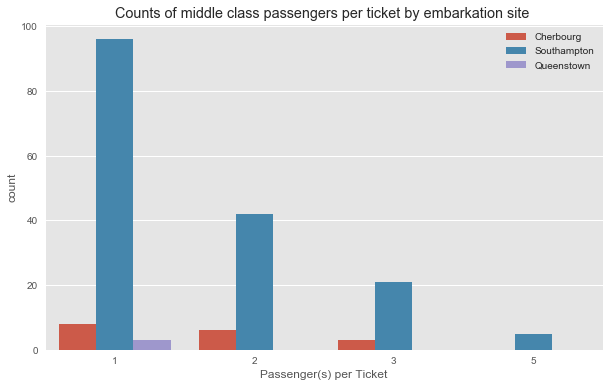

In [79]:
plt.figure(figsize = (10,6))
middle_class = titanic_2_df[titanic_2_df['Class'] == 'Middle']
ax = sns.countplot(x='Tcount', hue = 'Embarked', data = middle_class)
ax.legend(('Cherbourg','Southampton', 'Queenstown'), loc='upper right')
ax.set(title = 'Counts of middle class passengers per ticket by embarkation site ', \
      xlabel='Passenger(s) per Ticket'  )
plt.show()

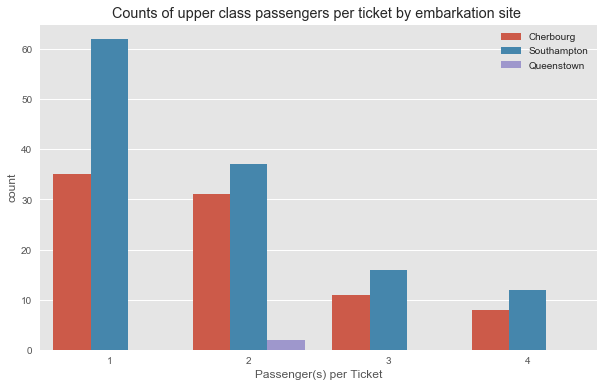

In [80]:
plt.figure(figsize = (10,6))
upper_class = titanic_2_df[titanic_2_df['Class'] == 'Upper']
ax = sns.countplot(x='Tcount', hue = 'Embarked', data = upper_class)
ax.legend(('Cherbourg','Southampton', 'Queenstown'), loc='upper right')
ax.set(title = 'Counts of upper class passengers per ticket by embarkation site ', \
xlabel='Passenger(s) per Ticket'      )
plt.show()


The upper class embarkation distibution is interesting and quite distinct from the middle and lower classes. From the above plots we see that most of the middle and lower class passengers boarded from Southampton. While the upper class passengers who embarked from Cherbourg are about 2/3 of those who embarked from Southampton. 

It is interesting to observe that the upper class consistantly distinct from the other two classes. 

I am cursious about the fare per passenger for the upper class in particular. Lets look at a box plot of fare per passenger comparing the three ports. 


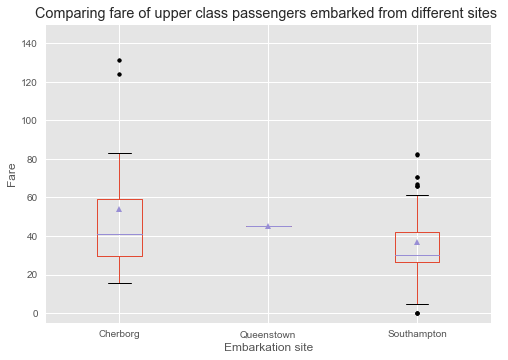

In [82]:
# box plot of upper class passengers fare by embarkation site

idx_pclass1_emb_S = (titanic_2_df['Pclass'] == 1) & (titanic_2_df['Embarked'] == 'S')
idx_pclass1_emb_C = (titanic_2_df['Pclass'] == 1) & (titanic_2_df['Embarked'] == 'C')
idx_pclass1_emb_Q = (titanic_2_df['Pclass'] == 1) & (titanic_2_df['Embarked'] == 'Q')

data_pclass1_fare = pd.DataFrame({'Southampton': titanic_2_df['Fare_pp'][idx_pclass1_emb_S],\
'Cherborg': titanic_2_df['Fare_pp'][idx_pclass1_emb_C], \
'Queenstown':titanic_2_df['Fare_pp'][idx_pclass1_emb_Q]})
flierprops = dict(marker='o', markerfacecolor='black', markersize=4,
                  linestyle='none')
ax = data_pclass1_fare.plot.box(ylim=(-5,150), showmeans=True, flierprops=flierprops)
ax.set_xlabel('Embarkation site')
ax.set_ylabel('Fare')
ax.set_title('Comparing fare of upper class passengers embarked from different sites ')
plt.show()

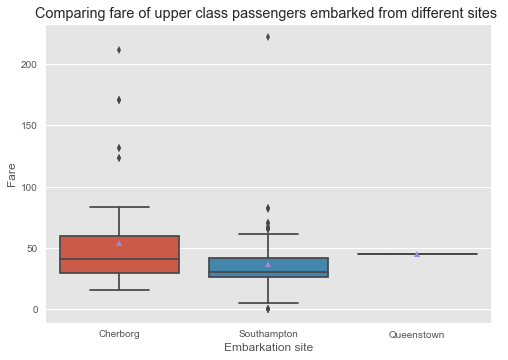

In [84]:
# same box plot as above but using seaborn instead of the panda wrapper.

# renameing the letters of embarkation site with name itself for x_ticks labeling 
upper_class.loc[:,'Embarked'].replace({'S':'Southampton','C':'Cherborg','Q':'Queenstown'},inplace=True)

ax = sns.boxplot(x='Embarked', y='Fare_pp', data=upper_class, showmeans=True)
ax.set_xlabel('Embarkation site')
ax.set_ylabel('Fare')
ax.set_title('Comparing fare of upper class passengers embarked from different sites ')
plt.show()

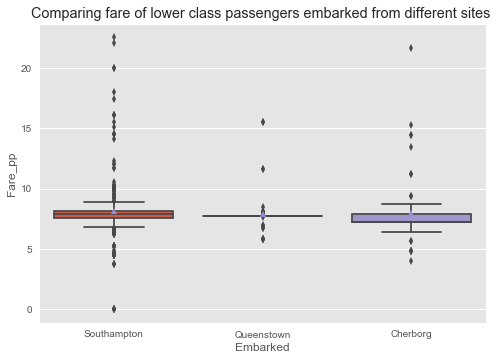

In [85]:
lower_class.loc[:,'Embarked'].replace({'S':'Southampton','C':'Cherborg','Q':'Queenstown'},inplace=True)

ax=sns.boxplot(x='Embarked', y='Fare_pp',data=lower_class, showmeans=True)
ax.set_title('Comparing fare of lower class passengers embarked from different sites ')
plt.show()

In [86]:
titanic_group_fare_pp_by_class_count = titanic_2_df.groupby(['Pclass','Sex','Embarked'])
titanic_group_fare_pp_by_class_count['Fare','Fare_pp'].median()

Fare    Fare_pp
Pclass Sex    Embarked                    
1      female C         83.1583  45.539600
              Q         90.0000  45.000000
              S         79.6500  31.650000
       male   C         61.6792  38.679167
              Q         90.0000  45.000000
              S         35.0000  30.000000
2      female C         24.0000  13.858300
              Q         12.3500  12.350000
              S         23.0000  13.000000
       male   C         25.8604  15.040600
              Q         12.3500  12.350000
              S         13.0000  13.000000
3      female C         14.4583   7.227100
              Q          7.7500   7.750000
              S         14.4500   7.925000
       male   C          7.2292   7.229200
              Q          7.7500   7.750000
              S          8.0500   7.895800

In [64]:
#print titanic_2_df.groupby(['Pclass','Tcount'])['Fare_pp'].median()

In [74]:
titanic_group_fare_pp_by_class_count = titanic_2_df.groupby(['Pclass','Embarked'])
titanic_group_fare_pp_by_class_count['Fare','Fare_pp','Tcount'].max()

Fare   Fare_pp  Tcount
Pclass Embarked                            
1      C         512.3292  211.5000       4
       Q          90.0000   45.0000       2
       S         263.0000  221.7792       4
2      C          41.5792   27.7208       3
       Q          12.3500   12.3500       1
       S          73.5000   32.5000       5
3      C          22.3583   21.6792       4
       Q          29.1250   15.5000       5
       S          69.5500   22.5250       7

As we see above, there is more variability among upper class passengers who embarked from Cherbourg. Recall that cabins are better recorded for upper class passengers than the others.
When we examine the fare for different cabins we see that upper class passengers with cabins have higher fares, some passengers have more than one cabin and they paid more. Those who embarked from Cherbourg with cabins paid the highest.

However, middle and lower class passengers with cabins did not pay differently than those with recorded cabins. 

As we see from the table above that when we compare the medians among the three social classes across the three sights of embarkation we find that this phenomenon occured only for the upper class the median for the middle and lower classes is relatively the same for those who embarked from the three ports. Also we observe that there is no significant diffence in fares between males and females. 

The second table above shows the distribution fare per passenger for upper class increased for tickets that had more than one passenger on it. While it decreased or stayed consistent for the middle and lower classes. 

## Survival patterns 

Now we would like to analyse charateristics of those who survived.

In [75]:
titanic_grouped_by_survival_class_sex = titanic_2_df.groupby(['Survival status','Class','Sex'])
titanic_grouped_by_survival_class_sex['Age','Fare_pp'].count()

Age  Fare_pp
Survival status Class  Sex                 
Died            Lower  female   55       72
                       male    215      300
                Middle female    6        6
                       male     84       91
                Upper  female    3        3
                       male     61       77
Survived        Lower  female   47       72
                       male     38       47
                Middle female   68       70
                       male     15       17
                Upper  female   82       91
                       male     40       45

From the table above we find that 125 of those whose age was not recorded did not survive while only 52 whose age is missing did survive. 

Next we will look at the median age and fare per passenger. I prefer to look at the median because both variables have slightly skewed disributions.  

In [76]:
titanic_grouped_by_survival_class_sex['Age','Fare_pp'].median()

Age  Fare_pp
Survival status Class  Sex                  
Died            Lower  female  22.0   7.7750
                       male    25.0   7.8958
                Middle female  32.5  13.0000
                       male    30.5  13.0000
                Upper  female  25.0  37.8875
                       male    45.5  33.5000
Survived        Lower  female  19.0   7.7625
                       male    25.0   7.9250
                Middle female  28.0  13.0000
                       male     3.0  13.0000
                Upper  female  35.0  40.0000
                       male    36.0  30.0000

In [77]:
titanic_2a_df.groupby(['Survived','Class','Embarked'])['PassengerId'].count()

Survived  Class   Embarked
0         Lower   C            23
                  Q            18
                  S           229
          Middle  C             7
                  Q             1
                  S            82
          Upper   C            21
                  Q             1
                  S            42
1         Lower   C            18
                  Q             6
                  S            61
          Middle  C             8
                  Q             1
                  S            74
          Upper   C            53
                  Q             1
                  S            66
Name: PassengerId, dtype: int64

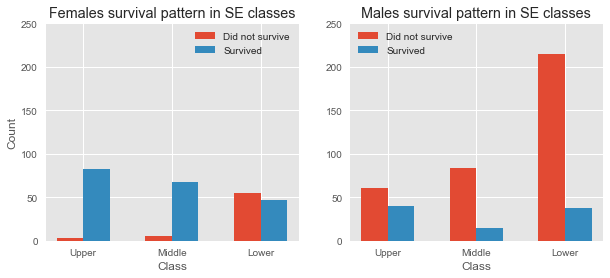

In [87]:
# identifying passengers in each of the three classes
idx_pclass1 = titanic_2a_df['Pclass'] == 1 
idx_pclass2 = titanic_2a_df['Pclass'] == 2 
idx_pclass3 = titanic_2a_df['Pclass'] == 3 
#identify passengers by sex
idx_fem = titanic_2a_df['Sex'] == 'female'
idx_male = titanic_2a_df['Sex'] == 'male'
#identify passengers who survived and who died
idx_surv_0 = titanic_2a_df['Survived'] == 0
idx_surv_1 = titanic_2a_df['Survived'] == 1

#identify female passengers  who died and who survived
idx_surv0_fem = idx_surv_0 & idx_fem
idx_surv1_fem = idx_surv_1 & idx_fem
#identify male passengers who died and who survived
idx_surv0_male = idx_surv_0 & idx_male
idx_surv1_male = idx_surv_1 & idx_male

# preparing the label
surv=('Did not survive','Survived')
# preparing data for first figure: females who survived and who died
data_1 = [titanic_2a_df['Pclass'][idx_surv0_fem],titanic_2a_df['Pclass'][idx_surv1_fem]]
#preparing data for second figure: males who survived and who died
data_2 = [titanic_2a_df['Pclass'][idx_surv0_male],titanic_2a_df['Pclass'][idx_surv1_male]]

# preparing for plot of two figures in one row
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4) )
# preparing hight of bar charts of counts of 
#passengers in each class in each of the four groups

fem_died = titanic_2a_df['Pclass'][idx_surv0_fem].value_counts(sort=False)
fem_survived = titanic_2a_df['Pclass'][idx_surv1_fem].value_counts(sort=False)
male_died = titanic_2a_df['Pclass'][idx_surv0_male].value_counts(sort=False)
male_survived = titanic_2a_df['Pclass'][idx_surv1_male].value_counts(sort=False)
#preparing bar chart
# number of groups (classes: lower, middle,upper)
ind = np.arange(3)
#width of each bar
width=0.3
#first plot for females 
rec1 = axes[0].bar(ind,fem_died,width)
rec2 = axes[0].bar(ind+width,fem_survived,width)
# labeling the females plot
axes[0].set_title('Females survival pattern in SE classes')
axes[0].set_xticks(ind+width/2)
axes[0].set_xticklabels(('Upper','Middle','Lower'))
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_ylim((0,250))
axes[0].legend((rec1[0],rec2[0]),surv)
# second plot for males
rec1 = axes[1].bar(ind,male_died,width)
rec2 = axes[1].bar(ind+width,male_survived,width)
# labeling the males plot
axes[1].set_title('Males survival pattern in SE classes')
axes[1].set_xticks(ind+width/2)
axes[1].set_xlabel('Class')
axes[1].set_xticklabels(('Upper','Middle','Lower'))
axes[1].set_ylim((0,250))
axes[1].legend((rec1[0],rec2[0]),surv)

plt.show()

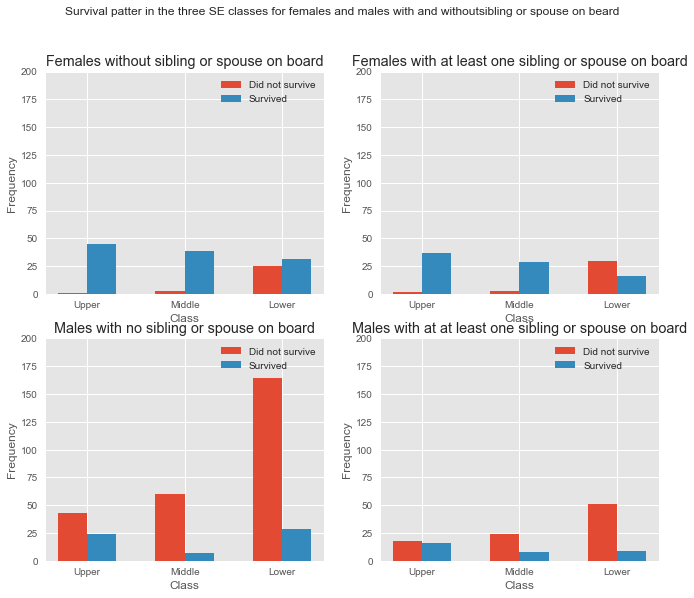

In [88]:
# Plot for females and males who died and survived by presence of absence of sibling or
# spouse on board.

# identify passenger who are with no sibling or spouse on board
idx_sibsp_0 = titanic_2a_df['SibSp'] == 0
# identify passenger who have at least one sibling or spouse on board
idx_sibsp_1 = titanic_2a_df['SibSp'] >= 1

# identify females who died or survived with no sibling or spouse on board
idx_surv0_fem_sbsp0 = idx_surv0_fem & idx_sibsp_0
idx_surv1_fem_sbsp0 = idx_surv1_fem & idx_sibsp_0
# identify females who died or survived with sibling or spouse on board
idx_surv0_fem_sbsp1 = idx_surv0_fem & idx_sibsp_1
idx_surv1_fem_sbsp1 = idx_surv1_fem & idx_sibsp_1

#identify males who died or survived with no sibling or spouse on board
idx_surv0_male_sbsp0 = idx_surv0_male & idx_sibsp_0
idx_surv1_male_sbsp0 = idx_surv1_male & idx_sibsp_0
#identify males who died or survived with sibling or spouse on board
idx_surv0_male_sbsp1 = idx_surv0_male & idx_sibsp_1
idx_surv1_male_sbsp1 = idx_surv1_male & idx_sibsp_1

# preparing a figure of four plots 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,9))

# preparing hight of bar charts of counts of 
#passengers in each class in each of the eight groups
#number of females in each of the four groups (died,survived)x(alone, with sibling or spouse)
fem_died_alone = titanic_2a_df['Pclass'][idx_surv0_fem_sbsp0].value_counts(sort=False)
fem_survived_alone = titanic_2a_df['Pclass'][idx_surv1_fem_sbsp0].value_counts(sort=False)
fem_died_sibsp = titanic_2a_df['Pclass'][idx_surv0_fem_sbsp1].value_counts(sort=False)
fem_survived_sibsp = titanic_2a_df['Pclass'][idx_surv1_fem_sbsp1].value_counts(sort=False)
#number of males in each of the four groups (died,survived)x(alone, with sibling or spouse)
male_died_alone = titanic_2a_df['Pclass'][idx_surv0_male_sbsp0].value_counts(sort=False)
male_survived_alone = titanic_2a_df['Pclass'][idx_surv1_male_sbsp0].value_counts(sort=False)
male_died_sibsp = titanic_2a_df['Pclass'][idx_surv0_male_sbsp1].value_counts(sort=False)
male_survived_sibsp = titanic_2a_df['Pclass'][idx_surv1_male_sbsp1].value_counts(sort=False)
# number of classes
ind = np.arange(3)
#width of each rectangle
width=0.3
# the bar chart for females alone (with no sibling or spouse on board)
rec1 = axes[0,0].bar(ind,fem_died_alone,width)
rec2 = axes[0,0].bar(ind+width,fem_survived_alone,width)
axes[0,0].set_title('Females without sibling or spouse on board')
axes[0,0].set_xticks(ind+width/2)
axes[0,0].set_xticklabels(('Upper','Middle','Lower'))
axes[0,0].set_ylim((0,315))
axes[0,0].legend((rec1[0],rec2[0]),surv)
axes[0,0].set_ylim((0,200))
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_xlabel('Class')

# the bar chart for females with sibling or spouse on board
rec1 = axes[0,1].bar(ind,fem_died_sibsp,width)
rec2 = axes[0,1].bar(ind+width,fem_survived_sibsp,width)
axes[0,1].set_title('Females with at least one sibling or spouse on board')
axes[0,1].set_xticks(ind+width/2)
axes[0,1].set_xticklabels(('Upper','Middle','Lower'))
axes[0,1].set_ylim((0,315))
axes[0,1].legend((rec1[0],rec2[0]),surv)
axes[0,1].set_ylim((0,200))
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_xlabel('Class')

# the bar chart for males alone (with no sibling or spouse on board)
rec1 = axes[1,0].bar(ind,male_died_alone,width)
rec2 = axes[1,0].bar(ind+width,male_survived_alone,width)
axes[1,0].set_title('Males with no sibling or spouse on board')
axes[1,0].set_xticks(ind+width/2)
axes[1,0].set_xticklabels(('Upper','Middle','Lower'))
axes[1,0].set_ylim((0,315))
axes[1,0].legend((rec1[0],rec2[0]),surv)
axes[1,0].set_ylim((0,200))
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlabel('Class')

# the bar chart for males with sibling or spouse on board
rec1 = axes[1,1].bar(ind,male_died_sibsp,width)
rec2 = axes[1,1].bar(ind+width,male_survived_sibsp,width)
axes[1,1].set_title('Males with at at least one sibling or spouse on board')
axes[1,1].set_xticks(ind+width/2)
axes[1,1].set_xticklabels(('Upper','Middle','Lower'))
axes[1,1].set_ylim((0,315))
axes[1,1].legend((rec1[0],rec2[0]),surv)
axes[1,1].set_ylim((0,200))
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_xlabel('Class')

fig.suptitle('Survival patter in the three SE classes for females and males with and without\
sibling or spouse on beard')
plt.show()

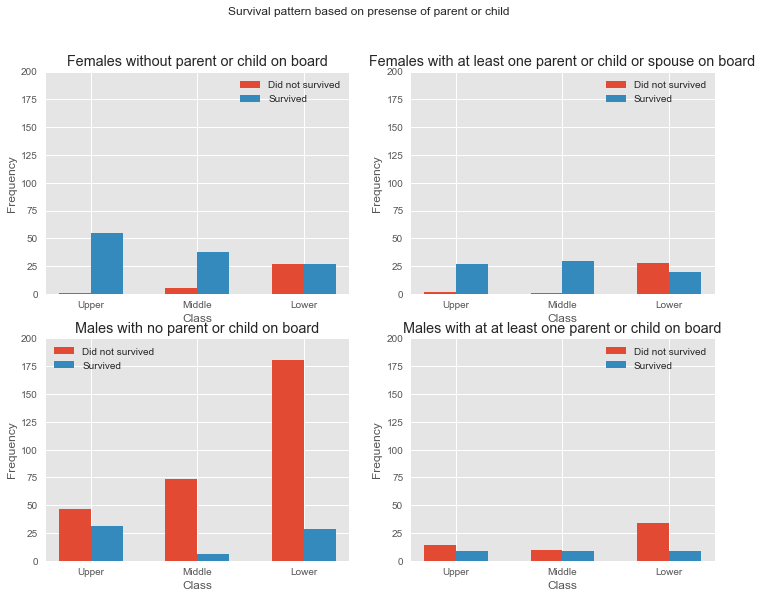

In [89]:
# Plot for females and males who died and survived by presence of absence of sibling or
# spouse on board.

#identify passengers with no child or parent on board
idx_parch_0 = titanic_2a_df['Parch'] == 0
#identify passengers with at least one child or parent on board
idx_parch_1 = titanic_2a_df['Parch'] >= 1

#identify female passengers who died or survived without child or parent on board
idx_surv0_fem_parch0 = idx_surv0_fem & idx_parch_0
idx_surv1_fem_parch0 = idx_surv1_fem & idx_parch_0
#identify female passengers who died or survived with child or parent on board
idx_surv0_fem_parch1 = idx_surv0_fem & idx_parch_1
idx_surv1_fem_parch1 = idx_surv1_fem & idx_parch_1

#identify male passengers who died or survived without child or parent on board
idx_surv0_male_parch0 = idx_surv0_male & idx_parch_0
idx_surv1_male_parch0 = idx_surv1_male & idx_parch_0
#identify male passengers who died or survived with child or parent on board
idx_surv0_male_parch1 = idx_surv0_male & idx_parch_1
idx_surv1_male_parch1 = idx_surv1_male & idx_parch_1

# counts of passengers by class in each of the eight groups
#females with no child or parent on board
fem_died_nopc = titanic_2a_df['Pclass'][idx_surv0_fem_parch0].value_counts(sort=False)
fem_survived_nopc = titanic_2a_df['Pclass'][idx_surv1_fem_parch0].value_counts(sort=False)
#females with child or parent on board
fem_died_parch = titanic_2a_df['Pclass'][idx_surv0_fem_parch1].value_counts(sort=False)
fem_survived_parch = titanic_2a_df['Pclass'][idx_surv1_fem_parch1].value_counts(sort=False)
#males with no child or parent on board
male_died_nopc = titanic_2a_df['Pclass'][idx_surv0_male_parch0].value_counts(sort=False)
male_survived_nopc= titanic_2a_df['Pclass'][idx_surv1_male_parch0].value_counts(sort=False)
#males with child or parent on board
male_died_parch = titanic_2a_df['Pclass'][idx_surv0_male_parch1].value_counts(sort=False)
male_survived_parch = titanic_2a_df['Pclass'][idx_surv1_male_parch1].value_counts(sort=False)

#label
surv=('Did not survived', 'Survived')
#preparing figue using four bar charts
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))
ind = np.arange(3) #number of class groups
width=0.3 # width of each bar

#bar chart for counts of each class of females with no child or parent on board 
rec1 = axes[0,0].bar(ind,fem_died_nopc,width)
rec2 = axes[0,0].bar(ind+width,fem_survived_nopc,width)
axes[0,0].set_title('Females without parent or child on board')
axes[0,0].set_xticks(ind+width/2)
axes[0,0].set_xticklabels(('Upper','Middle','Lower'))
axes[0,0].set_ylim((0,315))
axes[0,0].legend((rec1[0],rec2[0]),surv)
axes[0,0].set_ylim((0,200))
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_xlabel('Class')

#bar chart for counts of each class of females with child or parent on board 
rec1 = axes[0,1].bar(ind,fem_died_parch,width)
rec2 = axes[0,1].bar(ind+width,fem_survived_parch,width)
axes[0,1].set_title('Females with at least one parent or child or spouse on board')
axes[0,1].set_xticks(ind+width/2)
axes[0,1].set_xticklabels(('Upper','Middle','Lower'))
axes[0,1].set_ylim((0,315))
axes[0,1].legend((rec1[0],rec2[0]),surv)
axes[0,1].set_ylim((0,200))
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_xlabel('Class')

#bar chart for counts of each class of males with no child or parent on board 
rec1 = axes[1,0].bar(ind,male_died_nopc,width)
rec2 = axes[1,0].bar(ind+width,male_survived_nopc,width)
axes[1,0].set_title('Males with no parent or child on board')
axes[1,0].set_xticks(ind+width/2)
axes[1,0].set_xticklabels(('Upper','Middle','Lower'))
axes[1,0].set_ylim((0,315))
axes[1,0].legend((rec1[0],rec2[0]),surv)
axes[1,0].set_ylim((0,200))
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlabel('Class')

#bar chart for counts of each class of males with child or parent on board 
rec1 = axes[1,1].bar(ind,male_died_parch,width)
rec2 = axes[1,1].bar(ind+width,male_survived_parch,width)
axes[1,1].set_title('Males with at at least one parent or child on board')
axes[1,1].set_xticks(ind+width/2)
axes[1,1].set_xticklabels(('Upper','Middle','Lower'))
axes[1,1].set_ylim((0,315))
axes[1,1].legend((rec1[0],rec2[0]),surv)
axes[1,1].set_ylim((0,200))
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_xlabel('Class')

fig.suptitle('Survival pattern based on presense of parent or child')                
plt.show()

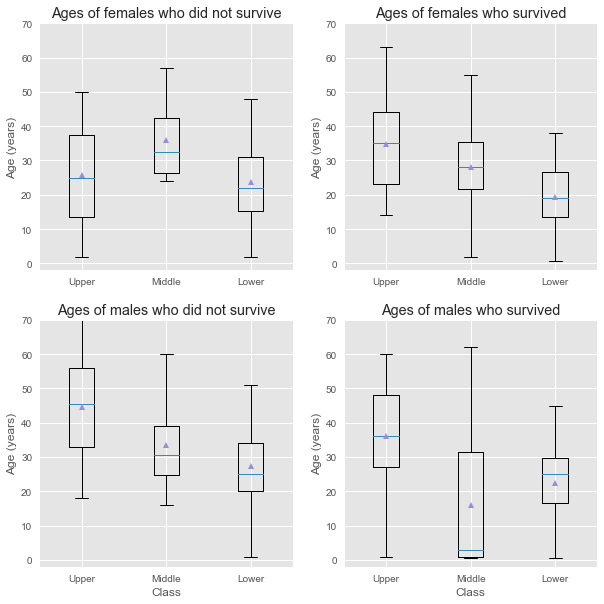

In [90]:
#idx_age_in  #id of passengers whose age record is available

idx_surv0_fem_pclass1= idx_pclass1 & idx_surv_0 & idx_fem
idx_surv0_fem_pclass2= idx_pclass2 & idx_surv_0 & idx_fem
idx_surv0_fem_pclass3= idx_pclass3 & idx_surv_0 & idx_fem

data_1=[titanic_2a_df['Age'][idx_surv0_fem_pclass1],titanic_2a_df['Age'][idx_surv0_fem_pclass2],
titanic_2a_df['Age'][idx_surv0_fem_pclass3]]

idx_surv1_fem_pclass1= idx_pclass1 & idx_surv_1 & idx_fem
idx_surv1_fem_pclass2= idx_pclass2 & idx_surv_1 & idx_fem
idx_surv1_fem_pclass3= idx_pclass3 & idx_surv_1 & idx_fem

data_2=[titanic_2a_df['Age'][idx_surv1_fem_pclass1],titanic_2a_df['Age'][idx_surv1_fem_pclass2],\
titanic_2a_df['Age'][idx_surv1_fem_pclass3]]

idx_surv0_male_pclass1= idx_pclass1 & idx_surv_0 & idx_male
idx_surv0_male_pclass2= idx_pclass2 & idx_surv_0 & idx_male
idx_surv0_male_pclass3= idx_pclass3 & idx_surv_0 & idx_male

data_3 = [titanic_2a_df['Age'][idx_surv0_male_pclass1], \
titanic_2a_df['Age'][idx_surv0_male_pclass2],\
titanic_2a_df['Age'][idx_surv0_male_pclass3]]

idx_surv1_male_pclass1= idx_pclass1 & idx_surv_1 & idx_male
idx_surv1_male_pclass2= idx_pclass2 & idx_surv_1 & idx_male
idx_surv1_male_pclass3= idx_pclass3 & idx_surv_1 & idx_male

data_4 = [titanic_2a_df['Age'][idx_surv1_male_pclass1],\
titanic_2a_df['Age'][idx_surv1_male_pclass2],\
titanic_2a_df['Age'][idx_surv1_male_pclass3]]


classes = ('Upper','Middle','Lower')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes[0,0].boxplot(data_1, showmeans = True)
axes[0,0].set_title('Ages of females who did not survive')
axes[0,0].set_ylim((-2,70))
axes[0,0].set_xticklabels(classes)
axes[0,0].set_ylabel('Age (years)')

axes[0,1].boxplot(data_2, showmeans = True)
axes[0,1].set_title('Ages of females who survived')
axes[0,1].set_ylim((-2,70))
axes[0,1].set_xticklabels(classes)
axes[0,1].set_ylabel('Age (years)')

axes[1,0].boxplot(data_3, showmeans = True)
axes[1,0].set_title('Ages of males who did not survive')
axes[1,0].set_ylim((-2,70))
axes[1,0].set_xticklabels(classes)
axes[1,0].set_ylabel('Age (years)')
axes[1,0].set_xlabel('Class')

axes[1,1].boxplot(data_4, showmeans = True)
axes[1,1].set_title('Ages of males who survived')
axes[1,1].set_ylim((-2,70))
axes[1,1].set_xticklabels(classes)
axes[1,1].set_ylabel('Age (years)')
axes[1,1].set_xlabel('Class')

plt.show()

A bar chart that shows how SE classes and sex are distribted across counts of tickets with multiple passengers among those who survived and those who did not survive.

Observe the differences between females and males in the three socio-economic classes. There is more males who did not survive and more from the lower class did not survive. However, we recall that 65% among all passengers are males and 70% among lower class passengers are males. Therefore one conjucture that males were either left out or ignored while giving priority for females and younger passenger and other male with families to be rescued. 

There are 169 lower class males with a single ticket who did not survive. The plot below is cut-off below at 100 so that other bare not too squashed down. 

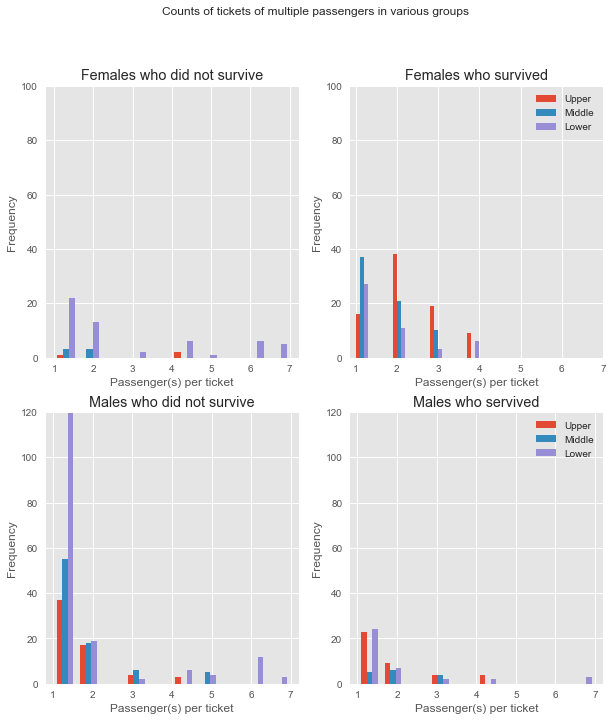

In [97]:
# histogram/bar chart of number of passenger per ticket

#identify female passengers who died in each class
idx_surv0_fem_pclass1= idx_pclass1 & idx_surv_0 & idx_fem
idx_surv0_fem_pclass2= idx_pclass2 & idx_surv_0 & idx_fem
idx_surv0_fem_pclass3= idx_pclass3 & idx_surv_0 & idx_fem

# list of number of female passengers who died  per ticket
data_1 = [titanic_2a_df['Tcount'][idx_surv0_fem_pclass1],\
titanic_2a_df['Tcount'][idx_surv0_fem_pclass2],\
titanic_2a_df['Tcount'][idx_surv0_fem_pclass3]]

# identify female passengers who survived in each class
idx_surv1_fem_pclass1= idx_pclass1 & idx_surv_1 & idx_fem
idx_surv1_fem_pclass2= idx_pclass2 & idx_surv_1 & idx_fem
idx_surv1_fem_pclass3= idx_pclass3 & idx_surv_1 & idx_fem

# list of number of female passengers who survived  per ticket
data_2 = [titanic_2a_df['Tcount'][idx_surv1_fem_pclass1],titanic_2a_df['Tcount'][idx_surv1_fem_pclass2],\
titanic_2a_df['Tcount'][idx_surv1_fem_pclass3]]

#identify male passengers who died in each class
idx_surv0_male_pclass1= (titanic_2a_df['Pclass'] == 1) & (titanic_2a_df['Survived'] == 0) & \
(titanic_2a_df['Sex'] == 'male')
idx_surv0_male_pclass2= idx_pclass2 & idx_surv_0 & idx_male
idx_surv0_male_pclass3= idx_pclass3 & idx_surv_0 & idx_male

# list of number of male passengers who died  per ticket
data_3 = [titanic_2a_df['Tcount'][idx_surv0_male_pclass1], \
titanic_2a_df['Tcount'][idx_surv0_male_pclass2],\
titanic_2a_df['Tcount'][idx_surv0_male_pclass3]]

#identify male passengers who survived in each class
idx_surv1_male_pclass1= idx_pclass1 & idx_surv_1 & idx_male
idx_surv1_male_pclass2= idx_pclass2 & idx_surv_1 & idx_male
idx_surv1_male_pclass3= idx_pclass3 & idx_surv_1 & idx_male

# list of number of male passengers who survived  per ticket
data_4 = [titanic_2a_df['Tcount'][idx_surv1_male_pclass1], \
titanic_2a_df['Tcount'][idx_surv1_male_pclass2],\
titanic_2a_df['Tcount'][idx_surv1_male_pclass3]]

#x-axis label and range
x_range=np.arange(1,max(titanic_2a_df['Tcount'])+1)
#legend label
pclass=('Upper','Middle','Lower')
#preparing the figure for four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,11))
# histogram of females who died per ticket count
axes[0,0].hist(data_1, rwidth=0.8, label=pclass)
axes[0,0].set_ylim((0,100))
axes[0,0].set_xticks(x_range)
axes[0,0].set_xticklabels(x_range)
# histogram of females who survived per ticket count
axes[0,1].hist(data_2,rwidth=2.8, label=pclass)
axes[0,1].set_ylim((0,100))
axes[0,1].set_xticks(x_range)
axes[0,1].set_xticklabels(x_range)
# histogram of males who died per ticket count
axes[1,0].hist(data_3,rwidth=0.7, label=pclass)
axes[1,0].set_ylim((0,120))
axes[1,0].set_xticks(x_range)
axes[1,0].set_xticklabels(x_range)
# histogram of males who survived per ticket count
axes[1,1].hist(data_4,rwidth=0.7, label=pclass)
axes[1,1].set_ylim((0,120))
axes[1,1].set_xticks(x_range)
axes[1,1].set_xticklabels(x_range)
axes[0,1].legend()
axes[1,1].legend()
axes[0,0].set_title('Females who did not survive')
axes[0,1].set_title('Females who survived')
axes[1,0].set_title('Males who did not survive')
axes[1,1].set_title('Males who servived')
axes[0,0].set_ylabel('Frequency')
axes[0,1].set_ylabel('Frequency')
axes[1,0].set_ylabel('Frequency')
axes[1,1].set_ylabel('Frequency')
axes[0,0].set_xlabel('Passenger(s) per ticket')
axes[0,1].set_xlabel('Passenger(s) per ticket')
axes[1,0].set_xlabel('Passenger(s) per ticket')
axes[1,1].set_xlabel('Passenger(s) per ticket')

fig.suptitle('Counts of tickets of multiple passengers in various groups')
plt.show()


The bar plot below shows the proportion of those who survived among females and males in each class. The proportions are based on bootstrap of 1000 resampling from the data. 

Observe that females are more likely to survive than males and those from the upper class are more likely to survive either females or males.

Later we will look at a statistical model that includes also the age and other factors.

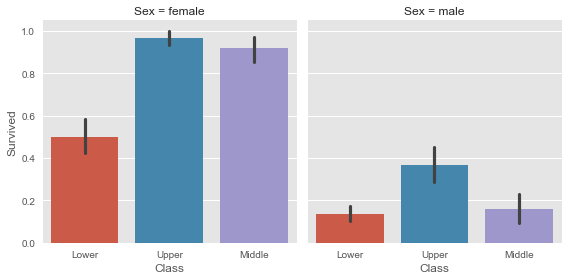

In [98]:
sns.factorplot(x='Class',y='Survived',col='Sex',kind='bar',data=titanic_df)
plt.show()

In [99]:
if  False: 
    titanic_2a_df.groupby(['Pclass','Sex','Survived','Tcount'])['PassengerId'].count()
    
if True:
    print titanic_2a_df.groupby(['Pclass','Sex','SibSp'])['PassengerId'].count()

Pclass  Sex     SibSp
1       female  0         46
                1         34
                2          3
                3          2
        male    0         67
                1         31
                2          2
                3          1
2       female  0         42
                1         28
                2          3
                3          1
        male    0         67
                1         27
                2          5
3       female  0         56
                1         28
                2          6
                3          5
                4          6
                5          1
        male    0        193
                1         35
                2          6
                3          3
                4         12
                5          4
Name: PassengerId, dtype: int64


In [100]:
titanic_2a_df[titanic_2a_df['Sex']=='male'].groupby(['Pclass','Tcount'])['Fare_pp'].mean()

Pclass  Tcount
1       1         37.493888
        2         41.083335
        3         69.172400
        4         40.689879
2       1         13.596527
        2         13.262067
        3          9.010973
        5         14.700000
3       1          8.162540
        2          8.316588
        3          6.361108
        4          3.694531
        5          5.825000
        6          6.524132
        7          6.869838
Name: Fare_pp, dtype: float64

I used the statistical software R to perform logistic regression analysis. The analysis showed that the only statistically significant variables are SE class, Sex, Age, and Sibling/Spouse or Tcount. The model is slightly stronger with Sibling/Spouse variable rather than Tcount. The two variables are correlated (0.66) and so one of the two is sufficient. 

Below I list for special cases the probability of survival based on this model. Since the age is included in the model, it is based only on passengers whose age is recorded.

The model shows that all factors negatively affects the chance to survive with upper class females with no sibling/spouse having the highest probability, and lower class men with sibling/spouse at the very bottom with very low probability. 

In [101]:
def prob_survival(pclass,sex,age,sibsp):
    #glm(formula = Survived ~ Pclass + Sex + Age + SibSp, family = binomial(link = "logit"), 
    #data = titanic.df)

    #Coefficients:
    #             Estimate Std. Error z value Pr(>|z|)    
    #(Intercept)  4.334201   0.450700   9.617  < 2e-16 ***
    #Pclass2     -1.414360   0.284727  -4.967 6.78e-07 ***
    #Pclass3     -2.652618   0.285832  -9.280  < 2e-16 ***
    #Sexmale     -2.627679   0.214771 -12.235  < 2e-16 ***
    #Age         -0.044760   0.008225  -5.442 5.27e-08 ***
    #SibSp       -0.380190   0.121516  -3.129  0.00176 ** 
    #---
    #Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 

    #(Dispersion parameter for binomial family taken to be 1)

    #Null deviance: 964.52  on 713  degrees of freedom
    #Residual deviance: 636.56  on 708  degrees of freedom
      #(177 observations deleted due to missingness)
    #AIC: 648.56
    
    E = np.exp(4.334201 - 1.41*(pclass == 2)-2.65*(pclass ==3)-2.63*(sex == 'male') \
               -0.045*age-0.38*sibsp)
    return E/(1+E)
print 'For females from the upper class of age:'

print '50, with no sibling/spouse has probability of survival',\
round(prob_survival(1,'female',50,0),2)

print '30, with no sibling/spouse has probability of survival',\
round(prob_survival(1,'female',30,0),2)

print '30, with one sibling/spouse has probability of survival',\
round(prob_survival(1,'female',30,1),2)

print '10, with one sibling has probability of survival',\
round(prob_survival(1,'female',10,1),2)

print ' '
print 'For females from the middle class of age:'

print '50, with no sibling/spouse has probability of survival',\
round(prob_survival(2,'female',50,0),2)

print '30, with no sibling/spouse has probability of survival',\
round(prob_survival(2,'female',30,0),2)

print '30, with one sibling/spouse has probability of survival',\
round(prob_survival(2,'female',30,1),2)

print '10, with one sibling has probability of survival',\
round(prob_survival(2,'female',10,1),2)

print ' '
print 'For females from the lower class of age:'

print '50, with no sibling/spouse has probability of survival',\
round(prob_survival(3,'female',50,0),2)

print '30, with no sibling/spouse has probability of survival',\
round(prob_survival(3,'female',30,0),2)

print '30, with one sibling/spouse has probability of survival',\
round(prob_survival(3,'female',30,1),2)

print '10, with one sibling has probability of survival',\
round(prob_survival(3,'female',10,1),2)

print ' '
print 'For males from the upper class of age:'

print '50, with no sibling/spouse has probability of survival',\
round(prob_survival(1,'male',50,0),2)

print '30, with no sibling/spouse has probability of survival',\
round(prob_survival(1,'male',30,0),2)

print '30, with one sibling/spouse has probability of survival',\
round(prob_survival(1,'male',30,1),2)

print '10, with one sibling has probability of survival',\
round(prob_survival(1,'male',10,1),2)

print ' '
print 'For males from the middle class of age:'

print '50, with no sibling/spouse has probability of survival',\
round(prob_survival(2,'male',50,0),2)

print '30, with no sibling/spouse has probability of survival',\
round(prob_survival(2,'male',30,0),2)

print '30, with one sibling/spouse has probability of survival',\
round(prob_survival(2,'male',30,1),2)

print '10, with one sibling has probability of survival',\
round(prob_survival(2,'male',10,1),2)

print ' '
print 'For males from the lower class of age:'

print '50, with no sibling/spouse has probability of survival',\
round(prob_survival(3,'male',50,0),2)

print '30, with no sibling/spouse has probability of survival',\
round(prob_survival(3,'male',30,0),2)

print '30, with one sibling/spouse has probability of survival',\
round(prob_survival(3,'male',30,1),2)

print '10, with one sibling has probability of survival',\
round(prob_survival(3,'male',10,1),2)



For females from the upper class of age:
50, with no sibling/spouse has probability of survival 0.89
30, with no sibling/spouse has probability of survival 0.95
30, with one sibling/spouse has probability of survival 0.93
10, with one sibling has probability of survival 0.97
 
For females from the middle class of age:
50, with no sibling/spouse has probability of survival 0.66
30, with no sibling/spouse has probability of survival 0.83
30, with one sibling/spouse has probability of survival 0.77
10, with one sibling has probability of survival 0.89
 
For females from the lower class of age:
50, with no sibling/spouse has probability of survival 0.36
30, with no sibling/spouse has probability of survival 0.58
30, with one sibling/spouse has probability of survival 0.49
10, with one sibling has probability of survival 0.7
 
For males from the upper class of age:
50, with no sibling/spouse has probability of survival 0.37
30, with no sibling/spouse has probability of survival 0.59
30, wit

In [ ]:
#sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

### Summary and conclusion:

We presented analysis of the titanic data set. We found that there are missing data in the age, cabin and embarked variables. The age and cabin variables show bias against the lower class passenger and males in particular. When we examined the survival pattern we found that the most passengers who are at risk (did not survive) are the lower class males in particular, many of whome had no cabin in record. 

Some of the exploration was done with all passengers while others in paticular survival analysis was done only on passengers whose age is in record. However, since we understand the composition of the passengers whose age is missing (mainly lower class males).

Understanding fare, embarkation site pattern where not age dependent so, I found not reason to exclude data of passengers whose age is missing for these analyses. 

The passenger population aboard the Titanic tend to be young with a mean around 28 years and standard deviation of 15 years. However, the upper class passengers tend to be older around 38 on average while the lower class tend to be younger around 25 on average. In each of the classes the females tend to be on average youner than the males. 

Moreover, 65% of all passengers are males, 60% of the males are in the lower SE class, 21% of the males are in the upper class while 19% are in the middle class.

Upper class female compose 30% of all the female population, the middle class compose 24%, while the lower class females compose 46%. 

When we examined the fares paid by for each ticket there was no relation between fare and age but there is considerable variability within each of the socio-economic (SE) classes 
and in particular among the upper class. 

We discovered that there are passengers who share the same ticket, so when we adjust the fare by dividing the fare of the ticket by the number of passengers who are sharing it, we found that the variability of adjusted fare withing each SE class is reduced. However the upper class variability was still higher.  

The cabin data is recorded mainly for upper class passengers and who had paid higher fares compared to middle and lower class passengers. 

The embarkation site showed a distinct pattern for the upper class compared to the other two.
Lower and middle class passengers embarked mainly from Southampton, relatively much less from the to the other two sites. When they did embark from Cherbourg they where either singles or couples. The upper class however embarked relatively more from Cherbourg and they did this as singles, or couples on the same ticket or three shared the same ticket or four shared the same ticket. These are also passengers who had cabins and paid higher fares.

Analysing the fare of upper class passengers who embarked from the three ports we found that those who embarked from Chergourg paid the highest on average and in particular this group showed the most variability. 
However among the upper class passenger there are those whose fare is as low as the lower class and this has no clear explanation. 

We also found that 39% of all the passengers shared a ticket with someone and also around 39% of the passengers shared the same last name. We assume that most of these passengers are families traveling together. 

When it comes to survival prediction, one would hypothesize that the group that is more at risk is the one that there are more of. So lower class males, followed by lower class females.
Also I would assume that traveling alone would put a traveler at more risk of not surviving since more related people are more likely to look for each other and hence higher chance to survive. 

Would fare affect survival risk? Well, given that fare is more tied to socio-econmic class and knowing that there is a great variability at least within the upper class, its very unlikely that it would show much of relation. 

Would site of embarkation relate to survival risk? Since most passengers embarked from Southampton port and those who embarked from the other ports, particularly Cherbourg are almost evenly divided between the upper and lower classes, it is less likely to make much of difference. However, the upper class passengers who embarked from Cherbourg are more likely to survive since they paid well for their cabins giving them priority somehow.

The logistic statistical model showed that the only variable that are significant are age, socio-economic class, sex, and having a sibling or spouse. The model predicts that upper class females have the highest chance of survival as most bar charts indicated. However,the lower the socio-economic class, the higher the age, the more the siblings or a spouse the lower the chance of survival. Being a male or of a lower socio-economic class lowers the chance of survival too. 

For further study of the data set, I would look more into passengers with the same last name since it combines children, parents, children or many times a spouse. How would the last name compare to the siblig/spouse or parent/child variables in their effect to the chance to survive?

Another point to look at, is to try to fill in the missing age variables. I can think of a couple of ways either by simply sampling age from a normal distirbution using the mean age per class, since the mean of the lower class is different from the lower class so these passengers are sampled from different normal distirbutions. 

Alternatively, we can first predict the age of the missing based on a statistical model using age values in record as well as the other variables and then sample from a normal distibution given the mean and standard error as described by the model. 

One would wonder if it possible to find patterns of availabel cabin assigment, and then use it to predict cabin pattern of the missing ones based on characteristics of the passengers. This is a third direction to explore but not sure it is feasible. 


### Acknowladgment :

I am very grateful for the reviwers for feeback in improving the presentation and improving the efficiecy of my code and graphs. 

### References:

I used stackoverflow.com as well as matplotlib.org extensively. Some examples are listed below.

https://stackoverflow.com/questions/10715965/add-one-row-in-a-pandas-dataframe

https://stackoverflow.com/questions/42768086/pandas-lookup-with-long-and-nested-conditions?noredirect=1&lq=1

https://stackoverflow.com/questions/21733893/pandas-dataframe-add-a-field-based-on-multiple-if-statements

https://stackoverflow.com/questions/13784192/creating-an-empty-pandas-dataframe-then-filling-it

http://pandas.pydata.org/pandas-docs/stable/merging.html#brief-primer-on-merge-methods-relational-algebra

https://stackoverflow.com/questions/36305695/assign-a-color-to-a-specific-box-in-seaborn-boxplot